import libraries

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [4]:
data = pd.read_csv('GEDEvent_v22_1 2.csv')
data.head()

/var/folders/fv/j2glptx96zv4jxc02f5d5ff40000gn/T/ipykernel_27674/869455486.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GEDEvent_v22_1 2.csv')


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,3,"""Agence France Presse,2017-08-01,At least 20 k...",Agence France Presse;Agence France Presse;Pajh...,2017-08-01;2017-08-01;2017-07-31,At least 20 killed in Shiite mosque attack in ...,"IS, interior ministry, security source",1,Kabul city,Iraqi embassy in Kabul,Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,15,"""BBC News,2021-08-26,Explosion at Kabul airpor...",BBC News;ShamshadNews on Twitter;Reuters News;...,2021-08-26;2021-08-26;2021-08-27;2021-08-27;20...,Explosion at Kabul airport;At least 11 people ...,US officials; Taliban spokesman Zabihullah Muj...,1,Kabul international airport,Kabul airport (Abbey gate entrance),Kabul province,Kabul district,34.564444,69.217222,POINT (69.2172222 34.5644444),179779,Afghanistan,700,Asia,1,1,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,5,"""Khaama Press,2021-08-28,First US airstrike hi...",Khaama Press;Agence France Presse;Reuters News...,2021-08-28;2021-08-28;2021-08-29;2021-08-28;20...,First US airstrike hits ISIS-K fighter after T...,US central command spokesperson Captain Bill U...,1,Jalalabad town,Police District 7 of Jalalabad city,Nangarhar province,Jalalabad district,34.428844,70.455750,POINT (70.45575 34.428844),179061,Afghanistan,700,Asia,1,1,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,8,"""CNN,2021-08-29,Nine family members, including...",CNN;Reuters News;Associated Press Newswires;BB...,2021-08-29;2021-08-29;2021-08-30;2021-08-31;20...,"Nine family members, including children, kille...",relative; US Central Command; witnesses; Afgha...,1,Kabul city,Kabul city (district 15),Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,130,Government of Afghanistan,292,292,Jam'iyyat-i Islami-yi Afghanistan,-1,"The Times 13 Jan 1989 ""Missiles and tea breaks...",NaN,NaN,NaN,Rebel source,4,Nangarhar province,Nangarhar province,Nangarhar province,NaN,34.333330,70.416670,POINT (70.41667 34.33333),179061,Afghanistan,700,Asia,1,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


data exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [6]:
data.isna().sum()

id                        0
relid                     0
year                      0
active_year               0
code_status               0
type_of_violence          0
conflict_dset_id          0
conflict_new_id           0
conflict_name             0
dyad_dset_id              0
dyad_new_id               0
dyad_name                 0
side_a_dset_id            0
side_a_new_id             0
side_a                    0
side_b_dset_id            0
side_b_new_id             0
side_b                    0
number_of_sources         0
source_article            1
source_office        103270
source_date          103270
source_headline      103270
source_original       39688
where_prec                0
where_coordinates         0
where_description      5476
adm_1                 15875
adm_2                 62951
latitude                  0
longitude                 0
geom_wkt                  0
priogrid_gid              0
country                   0
country_id                0
region              

In [7]:
#calculate number of rows 
data.shape[0]

293634

data cleaning

In [8]:
# @calculate the sum of all values in deaths_b
data['deaths_b'].sum()

# data['Event_Type'].value_counts()

698749

In [9]:
#sort by year   
year = data.sort_values(by=['year']).head()
year
# data['year'].value_counts()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
185494,72461,SRI-1989-3-1123-58,1989,1,Clear,3,281,511,JVP - Civilians,281,978,JVP - Civilians,281,281,JVP,9999,1,Civilians,-1,"Reuters, 14 September 1989",NaN,NaN,NaN,military sources,6,Sri Lanka,Sri Lanka,NaN,NaN,7.000000,81.000000,POINT (0 0),129961,Sri Lanka,780,Asia,2,2,1989-09-13 00:00:00.000,1989-09-14 00:00:00.000,0,0,0,0,0,19,0,NaN,NaN
185405,76820,SRI-1989-3-780-5,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 5 March 1989",NaN,NaN,NaN,LTTE,3,Polonnaruwa district,Polonnaruwa district,North Central province,Polonnaruwa district,8.000000,81.000000,POINT (81 8),141643,Sri Lanka,780,Asia,2,2,1989-03-03 00:00:00.000,1989-03-05 00:00:00.000,0,0,3,0,3,16,3,780.0,NaN
185404,77770,SRI-1989-3-780-4,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 11 February 1989",NaN,NaN,NaN,residents,1,Suriyawewa locality,"Suriyawewa, 30 km north of Hambantota",Southern province,Hambantota district,6.321100,80.997200,POINT (80.9972 6.3211),138762,Sri Lanka,780,Asia,1,1,1989-02-10 00:00:00.000,1989-02-10 00:00:00.000,0,0,0,0,0,6,0,780.0,NaN
185403,77769,SRI-1989-3-780-1,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"R, 1994-01-03",NaN,NaN,NaN,"see ""what""",2,Embilipitiya town,"Suriyakande, 165 km (100 miles) south of Colom...",Sabaragamuwa province,Ratnapura district,6.343889,80.848889,POINT (80.848889 6.343889),138762,Sri Lanka,780,Asia,2,5,1989-01-01 00:00:00.000,1989-12-31 00:00:00.000,0,0,15,0,15,300,15,780.0,NaN
185401,75690,SRI-1989-1-687-2,1989,1,Clear,1,352,352,Sri Lanka (Ceylon): Eelam,778,778,Government of Sri Lanka - EPRLF,145,145,Government of Sri Lanka,322,322,EPRLF,-1,R 12/3/1989 SEVENTEEN SRI LANKAN SOLDIERS KILL...,NaN,NaN,NaN,military sources,1,Madukanda town,Madukanda town,North Eastern province,Vavuniya district,8.742300,80.534500,POINT (80.5345 8.7423),142362,Sri Lanka,780,Asia,1,1,1989-12-03 00:00:00.000,1989-12-03 00:00:00.000,17,0,0,0,17,17,17,780.0,NaN


In [10]:
data['year'].value_counts()

2014    25885
2013    24458
2015    19551
2012    18451
2016    16796
2021    16609
2017    15851
2019    13244
2018    13065
2020    12692
2011     7599
1992     7321
2009     7035
2007     6695
1994     6617
1993     6504
2002     6435
2008     6279
2010     6223
2004     6153
2000     5432
2005     5334
2006     5243
2003     4333
2001     4140
1999     4079
1995     3875
1998     3716
1990     3196
1996     2858
1991     2855
1997     2569
1989     2541
Name: year, dtype: int64

In [11]:
# 
data['active_year']

0         1
1         1
2         1
3         1
4         1
         ..
293629    1
293630    1
293631    1
293632    1
293633    1
Name: active_year, Length: 293634, dtype: int64

<AxesSubplot:xlabel='side_a', ylabel='deaths_b'>

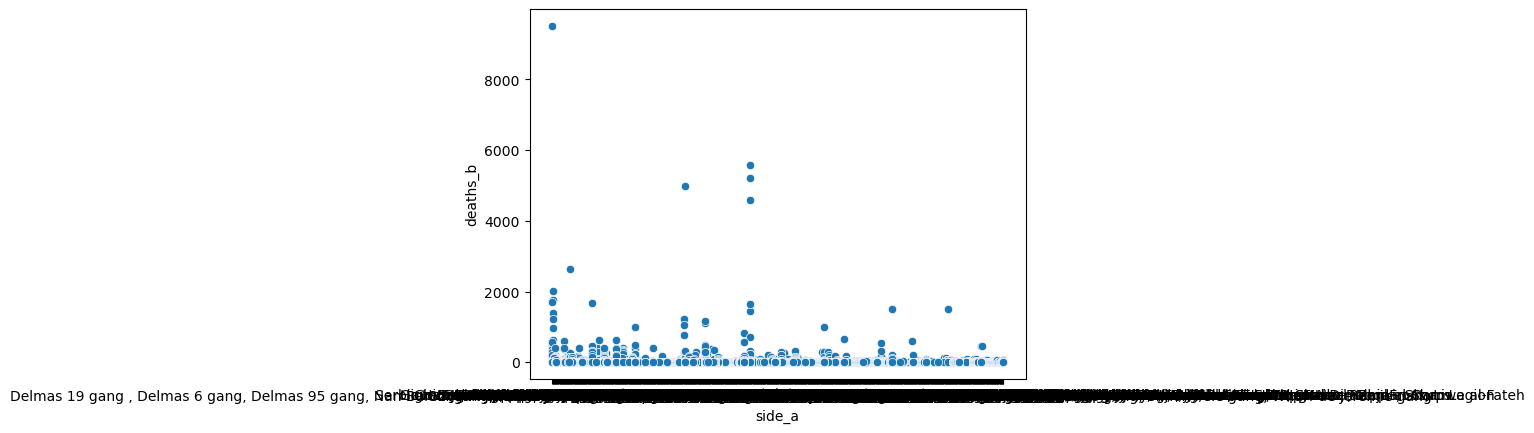

In [12]:
# make sns scatter plot of year and deaths_b
sns.scatterplot(x='side_a', y='deaths_b', data=data)



In [13]:
#groupby country and sum deaths_b
grouped = data.groupby('country')['deaths_b'].sum()
grouped


country
Afghanistan                        182674
Albania                                 4
Algeria                             15065
Angola                               7677
Argentina                               0
Armenia                                60
Australia                               1
Austria                                 0
Azerbaijan                           5317
Bahrain                                 0
Bangladesh                            375
Belgium                                 3
Benin                                   0
Bhutan                                  0
Bolivia                                27
Bosnia-Herzegovina                  10512
Botswana                                0
Brazil                                234
Burkina Faso                         1122
Burundi                              5559
Cambodia (Kampuchea)                  691
Cameroon                             3084
Canada                                 17
Central African Republic  

In [15]:
# group by country and years and sum deaths_b
grouped_year = data.groupby(['country', 'year'])['deaths_b'].sum().sort_values(ascending=False)
grouped_year.head(20)


country      year
Afghanistan  2021    30824
Syria        2014    28609
Afghanistan  2019    23815
Syria        2013    20437
             2015    20331
Afghanistan  2018    19877
Syria        2016    18424
Afghanistan  2017    16238
             2016    14537
             2020    13345
             2015    12048
Iraq         1991    10513
Syria        2017    10487
             2012     8882
Iraq         2014     7760
             2015     7595
Sri Lanka    2008     7148
Afghanistan  2014     6884
Syria        2018     6229
Sri Lanka    1991     5302
Name: deaths_b, dtype: int64